### Notebook for analyzing datasets

In [45]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

In [2]:
# Gene Expression Dataset 1 (GEX1)
gex1 = sc.read_h5ad('../multiome/multiome_gex_processed_training.h5ad')

# DNA Accessibility Dataset (ATAC)
atac = sc.read_h5ad('../multiome/multiome_atac_processed_training.h5ad')

# ----------------------------

# Gene Expression Dataset 2 (GEX2)
gex2 = sc.read_h5ad('../cite/cite_gex_processed_training.h5ad')

# Protein Abundance Dataset (ADT)
adt = sc.read_h5ad('../cite/cite_adt_processed_training.h5ad')

### Gene expression data (GEX)

In [3]:
gex1

AnnData object with n_obs × n_vars = 22463 × 13431
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'cell_type', 'pseudotime_order_GEX', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'dataset_id', 'organism'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'log_norm'

In [4]:
# Data Matrix, each cell is a row and each column is a feature (in this case the expression value of a gene) 

gex1.X.shape

(22463, 13431)

In [5]:
# This object also stores metadata for the cells as a dataframe

gex1.obs

,n_genes_by_counts,pct_counts_mt,n_counts,n_genes,size_factors,phase,cell_type,pseudotime_order_GEX,batch
TAGTTGTCACCCTCAC-1-s1d1,1022,1.061008,1508.0,1022,0.453484,S,Naive CD20+ B,NaN,s1d1
CTATGGCCATAACGGG-1-s1d1,1081,0.604230,1655.0,1081,0.455631,G2M,CD14+ Mono,NaN,s1d1
CCGCACACAGGTTAAA-1-s1d1,3304,0.650069,7230.0,3304,2.435348,G2M,CD8+ T,NaN,s1d1
TCATTTGGTAATGGAA-1-s1d1,793,0.812274,1108.0,793,0.347226,G2M,CD8+ T,NaN,s1d1
ACCACATAGGTGTCCA-1-s1d1,1219,1.674770,1851.0,1219,0.534205,G2M,CD16+ Mono,NaN,s1d1
...,...,...,...,...,...,...,...,...,...
TAGTAAGCAACTAGGG-8-s3d6,1313,0.000000,1937.0,1313,0.522115,S,HSC,0.098024,s3d6
TGGTCCTTCGGCTAGC-8-s3d6,2846,0.015901,6289.0,2846,1.737451,G2M,CD4+ T activated,NaN,s3d6
CGCTTGCGTTGTTGGA-8-s3d6,983,0.000000,1390.0,983,0.291723,G2M,pDC,NaN,s3d6
ACCCTCCCAGCCAGTT-8-s3d6,1351,0.000000,2190.0,1351,0.585303,G2M,CD8+ T,NaN,s3d6


In [6]:
# This object also stores metadata for the features(i.e. genes) as a dataframe

gex1.var

,gene_ids,feature_types,genome
AL627309.5,ENSG00000241860,GEX,GRCh38
LINC01409,ENSG00000237491,GEX,GRCh38
LINC01128,ENSG00000228794,GEX,GRCh38
NOC2L,ENSG00000188976,GEX,GRCh38
KLHL17,ENSG00000187961,GEX,GRCh38
...,...,...,...
MT-ND5,ENSG00000198786,GEX,GRCh38
MT-ND6,ENSG00000198695,GEX,GRCh38
MT-CYB,ENSG00000198727,GEX,GRCh38
AL592183.1,ENSG00000273748,GEX,GRCh38


In [16]:
# Warning: this is slow
sc.pp.neighbors(gex1)
sc.tl.umap(gex1)

In [47]:
np.save('atac_pca',atac.obsm['X_pca'])
np.save('gex_pca',gex1.obsm['X_pca'])

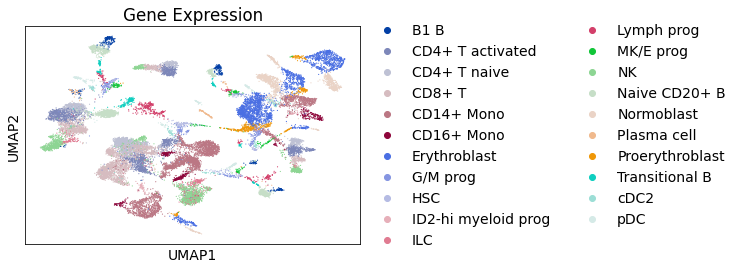

In [76]:
sc.pl.umap(gex1, color=['cell_type'], title='Gene Expression')

### DNA Accessibility data (ATAC)

In [7]:
atac

AnnData object with n_obs × n_vars = 22463 × 116490
    obs: 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'cell_type', 'pseudotime_order_ATAC', 'batch'
    var: 'feature_types'
    uns: 'dataset_id', 'gene_activity_var_names', 'organism'
    obsm: 'gene_activity', 'lsi_full', 'lsi_red', 'umap'
    layers: 'counts'

In [8]:
# Data Matrix, each cell is a row and each column is a feature (in this case the accessibility of the DNA at a specific position) 

atac.X.shape

(22463, 116490)

In [17]:
# Warning: this is slow
sc.pp.neighbors(atac)
sc.tl.umap(atac)

         Falling back to preprocessing with `sc.pp.pca` and default params.


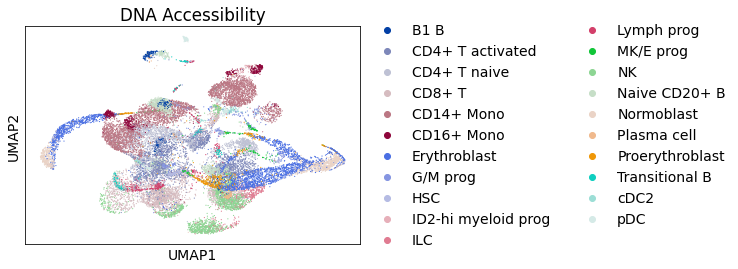

In [74]:
sc.pl.umap(atac, color=['cell_type'], title='DNA Accessibility')

In [9]:
# This object also stores metadata for the cells as a dataframe

atac.obs

,nCount_peaks,atac_fragments,reads_in_peaks_frac,blacklist_fraction,nucleosome_signal,cell_type,pseudotime_order_ATAC,batch
TAGTTGTCACCCTCAC-1-s1d1,4031.0,5400,0.746481,0.003473,0.642468,Naive CD20+ B,NaN,s1d1
CTATGGCCATAACGGG-1-s1d1,8636.0,19266,0.448251,0.003126,1.220679,CD14+ Mono,NaN,s1d1
CCGCACACAGGTTAAA-1-s1d1,4674.0,6177,0.756678,0.001284,0.692573,CD8+ T,NaN,s1d1
TCATTTGGTAATGGAA-1-s1d1,2803.0,4019,0.697437,0.000714,0.633838,CD8+ T,NaN,s1d1
ACCACATAGGTGTCCA-1-s1d1,1790.0,2568,0.697040,0.003352,0.727660,CD16+ Mono,NaN,s1d1
...,...,...,...,...,...,...,...,...
TAGTAAGCAACTAGGG-8-s3d6,7239.0,10580,0.684216,0.000553,0.866142,HSC,0.23367,s3d6
TGGTCCTTCGGCTAGC-8-s3d6,16056.0,22771,0.705107,0.000810,0.964006,CD4+ T activated,NaN,s3d6
CGCTTGCGTTGTTGGA-8-s3d6,8388.0,14137,0.593337,0.000358,1.215227,pDC,NaN,s3d6
ACCCTCCCAGCCAGTT-8-s3d6,1001.0,1381,0.724837,0.000000,0.714286,CD8+ T,NaN,s3d6


### Protein abundance

In [3]:
adt

AnnData object with n_obs × n_vars = 43976 × 134
    obs: 'n_antibodies_by_counts', 'total_counts', 'iso_count', 'cell_type', 'pseudotime_order_ADT', 'batch'
    var: 'feature_types'
    uns: 'dataset_id', 'organism'
    obsm: 'X_pca', 'X_umap', 'isotype_controls'
    layers: 'counts'

In [4]:
gex2

AnnData object with n_obs × n_vars = 43976 × 13953
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'size_factors', 'phase', 'cell_type', 'pseudotime_order_GEX', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells-s1d1', 'highly_variable-s1d1', 'n_cells-s1d2', 'highly_variable-s1d2', 'n_cells-s1d3', 'highly_variable-s1d3', 'n_cells-s2d1', 'highly_variable-s2d1', 'n_cells-s2d4', 'highly_variable-s2d4', 'n_cells-s3d6', 'highly_variable-s3d6', 'n_cells-s3d7', 'highly_variable-s3d7'
    uns: 'dataset_id', 'organism'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'log_norm'